# Exploration of Amazon consumer products reviews
## by Kyle McMillan

## Preliminary Wrangling

> This investigation explores the Amazon US marketplace reviews dataset containing approximately 7 million unique reviews.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator
import seaborn as sb
import re
import random
#random.seed(42)
import statistics

%matplotlib inline

In [2]:
#Data is loaded from a TSV file. Bad lines are dropped as fixing these manually will take too much time 
#for the low number of lines with errors.
reviews=pd.read_csv(r"amazon_reviews_multilingual_US_v1_00.tsv", sep="\t", error_bad_lines=False, header=0)

b'Skipping line 3231472: expected 15 fields, saw 22\n'
b'Skipping line 3509762: expected 15 fields, saw 22\n'
b'Skipping line 4018793: expected 15 fields, saw 22\n'
b'Skipping line 4280173: expected 15 fields, saw 22\nSkipping line 4290596: expected 15 fields, saw 22\n'
b'Skipping line 4331421: expected 15 fields, saw 22\nSkipping line 4340267: expected 15 fields, saw 22\nSkipping line 4341665: expected 15 fields, saw 22\nSkipping line 4386155: expected 15 fields, saw 22\nSkipping line 4388098: expected 15 fields, saw 22\n'
b'Skipping line 4408027: expected 15 fields, saw 22\nSkipping line 4442615: expected 15 fields, saw 22\n'
b'Skipping line 4519623: expected 15 fields, saw 22\n'
b'Skipping line 4525797: expected 15 fields, saw 22\nSkipping line 4543519: expected 15 fields, saw 22\n'
b'Skipping line 4587726: expected 15 fields, saw 22\nSkipping line 4589301: expected 15 fields, saw 22\nSkipping line 4634393: expected 15 fields, saw 22\n'
b'Skipping line 4666168: expected 15 fields, s

In [3]:
#View the unique items in the product category.
reviews.product_category.unique()

array(['Books', 'Music', 'Video', 'Video DVD', 'Toys', 'Tools',
       'Office Products', 'Video Games', 'Software',
       'Digital_Music_Purchase', 'Home Entertainment', 'Electronics',
       'Digital_Ebook_Purchase', 'Digital_Video_Download', 'Kitchen',
       'Camera', 'Outdoors', 'Musical Instruments', 'Sports', 'Watches',
       'PC', 'Home', 'Wireless', 'Beauty', 'Baby', 'Home Improvement',
       'Apparel', 'Shoes', 'Lawn and Garden', 'Mobile_Electronics',
       'Health & Personal Care', 'Grocery', 'Luggage',
       'Personal_Care_Appliances', 'Automotive', 'Mobile_Apps',
       'Furniture', '2012-12-22', 'Pet Products'], dtype=object)

In [4]:
#View the data that has a product category of a date.
reviews.query("product_category == '2012-12-22'")

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
1852794,US,49422747,R2T9JZNQ996WRC,1568652240,569473707,Emma (Large Print)\tBooks\t5\t0\t0\tN\tY\tFoll...,2012-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#View the data string in the product title
list(reviews[reviews.review_id=="R2T9JZNQ996WRC"].product_title)

['Emma (Large Print)\tBooks\t5\t0\t0\tN\tY\tFollows Austen\'s book closley\tI have the movie with Ms Paltrow starring, so I bought the book to see how it matched. Very well done.\t2012-12-22\nUS\t7209000\tR1MZOZGBLVKYVP\tB003E8P9G0\t446279348\tThe Kane Chronicles, Book One: The Red Pyramid\tDigital_Ebook_Purchase\t5\t0\t0\tN\tN\tso....\tmy brother read this book and he was instantly addicted to it so i started reading it on my kindle and i goten adddicted to it too. i would say that it is a must read.Questions or Comments my kindle email is  haili@kindle.com\t2012-12-22\nUS\t49422747\tR31UI3EECPWNVA\tB002EWD0I6\t647475881\tLark Rise to Candleford: Season 1\tVideo DVD\t4\t0\t0\tN\tY\tGood\tI thought this would be more of theprevious characters of Cranford, but not to be.  This was good enough for me to order the 2nd season.\t2012-12-22\nUS\t7209000\tR2UXMYNK8AEEVR\tB005CRQ4GU\t632021160\tThe Third Wheel (Diary of a Wimpy Kid, Book 7)\tDigital_Ebook_Purchase\t5\t1\t2\tN\tN\tso....\tI LOV

In [6]:
#Drop this line as it appears to have been parsed wrong because of the extra "/t" in the title column and there are a lot
#of extra reviews in this title string.
reviews.drop(reviews.loc[reviews.product_category.isin(['2012-12-22'])].index, inplace=True)
reviews.product_category.unique()

array(['Books', 'Music', 'Video', 'Video DVD', 'Toys', 'Tools',
       'Office Products', 'Video Games', 'Software',
       'Digital_Music_Purchase', 'Home Entertainment', 'Electronics',
       'Digital_Ebook_Purchase', 'Digital_Video_Download', 'Kitchen',
       'Camera', 'Outdoors', 'Musical Instruments', 'Sports', 'Watches',
       'PC', 'Home', 'Wireless', 'Beauty', 'Baby', 'Home Improvement',
       'Apparel', 'Shoes', 'Lawn and Garden', 'Mobile_Electronics',
       'Health & Personal Care', 'Grocery', 'Luggage',
       'Personal_Care_Appliances', 'Automotive', 'Mobile_Apps',
       'Furniture', 'Pet Products'], dtype=object)

In [7]:
#View the dataframe's info
print(reviews.info(null_counts=True ))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6900885 entries, 0 to 6900885
Data columns (total 15 columns):
marketplace          6900885 non-null object
customer_id          6900885 non-null int64
review_id            6900885 non-null object
product_id           6900885 non-null object
product_parent       6900885 non-null int64
product_title        6900885 non-null object
product_category     6900885 non-null object
star_rating          6900885 non-null float64
helpful_votes        6900885 non-null float64
total_votes          6900885 non-null float64
vine                 6900885 non-null object
verified_purchase    6900885 non-null object
review_headline      6900811 non-null object
review_body          6900810 non-null object
review_date          6900562 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 842.4+ MB
None


In [8]:
#Investigate the reason that a few reviews have NaN for a date
dateless = reviews.loc[reviews['review_date'].isin(reviews.review_date.dropna().unique())==False]
dateless.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
142642,US,52767614,RJBEAQJ92LS61,B00003CXDG,765637830,Mission: Impossible 2 (Widescreen Edition),Video DVD,2.0,0.0,0.0,N,N,Technology is not always beneficial -\tespecia...,2001-03-08,NaN
186564,US,50374272,R2LXX6V7B1PICZ,B00005OB0A,321992753,Fever,Music,5.0,0.0,0.0,N,N,The music you were playing really blew my mind...,2001-10-25,NaN
217791,US,42627253,R1CRCYSML85MB4,B00005JKZQ,167276143,Showtime,Video DVD,5.0,5.0,6.0,N,N,It's............SHOWTIME!!!!!\tShowtime is the...,2002-03-16,NaN
235044,US,52442862,R1YZIXBH6AVF4E,B00000JMQC,79142420,Return to Oz [VHS],Video,5.0,6.0,7.0,N,N,The Wizard of Oz it is not--should not be!\tFo...,2002-06-10,NaN
239621,US,47692344,R12KVFMZYPXNF6,B00003CWL6,304141589,American Beauty (1999),Video DVD,5.0,1.0,3.0,N,N,"It's just STUFF!!!\t\\American Beauty\\"" is in...",2002-06-30,NaN


In [9]:
#It seems there was an issue during the reading of the TSV file and the review titles used a tab space. Where read_csv was
#looking for a "\t" delimiter

#Investigate the titles for each of the reviews to see if there is any thing unusual
#As this is a very large and long list, a random sample of 5 were chosen.
DL_random_list = random.sample(list(dateless.review_id), 5)
for i in DL_random_list:
    print(re.split("\t", list(dateless[dateless.review_id==i].review_headline)[0])[0])

It's............SHOWTIME!!!!!
 It was great to read it again
 I know I'm late discovering this series but I'm so glad I did
 Fantastic movie. Very deliberate however well worth the patience
Maybe the best...


In [10]:
#Investigate the body of the dateless reviews to see if there is anything unusual.
for i in DL_random_list:
    print(re.split("\t", list(dateless[dateless.review_id==i].review_headline)[0])[1:])

['Showtime is the Reality-TV era\'s answer to Cop/Buddy movies like the Lethal Weapon series. When a dedicated detective (Robert De Niro) shoots a TV camera during a bust, the Network offers the LAPD a choice: A lawsuit, or the use of De Niro for a reality based show. The camera-shy de Niro is not thrilled, to say the least. And when he finds out that he will be partnered up with Trey \\\\Ice Trey\\\\" Sellers, a frustrated (Bad!) Actor/Beat Cop, the fur starts to fly.<br />   Murphy and De Niro are on the trail of a vicious Club Owner who is in posession of a batch of specially made guns; They fire such large rounds that they are capable of knocking down houses. You can imagine what they\'ll do to a bullet-proof vest...<br />  Showtime has some really great action sequences; The climax was actually something that I had never seen before in a movie. Points for originality! The real selling point is the pairing of Eddie Murphy and Robert de Niro. The two are priceless when they are onsc

In [11]:
#It seems like there are a lot of other reviews mixed into the body of some of the dateless reviews.
#As there are a very large number of total reviews, and wrangling the data to sort out the 300 or so that need to be fixed,
#I have decided to drop these rows.
reviews.drop(dateless.index, inplace=True)
reviews.loc[reviews['review_date'].isin(reviews.review_date.dropna().unique())==False]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date


In [12]:
#Investigate the reviews where there is no headline to see if there is anything unusual.
reviews.loc[reviews['review_headline'].isin(reviews.review_headline.dropna().unique())==False]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
144995,US,51263804,RRR6EK045G5YL,630438551X,212477251,Romeo & Juliet [VHS],Video,5.0,4.0,8.0,N,N,NaN,I consider myself to be a pretty much diehard ...,2001-03-21
274671,US,34490235,R25MC0QXPV5CRZ,6305949980,664817538,The Nightmare Before Christmas (Special Edition),Video DVD,4.0,1.0,6.0,N,N,NaN,"Three words, \\""BEST MOVIE EVER.\\"" If you hav...",2002-12-11
373447,US,23532323,R1MNPI81JJ62NI,B0000DD7NL,868764779,The Diary of Alicia Keys,Music,5.0,0.0,2.0,N,N,NaN,I love this cd! My favorite two songs are:<br...,2004-01-12
450489,US,43058957,RIHK7J9KBB62V,B00005V3Z4,681790048,Donnie Darko (Widescreen Edition),Video DVD,4.0,3.0,8.0,N,N,NaN,It actually is pretty hard to classify this mo...,2004-11-18
515646,US,34215909,R1HAKDWL5X86B9,B00014NE62,59241661,Maurice - The Merchant Ivory Collection,Video DVD,4.0,2.0,3.0,N,N,NaN,"Goes at quite a steady pace, however, this is ...",2005-08-12
522262,US,36882963,R2VEG37XSHHQMO,B0002Y4TTC,773850099,Blind Guardian - Imaginations Through the Look...,Video DVD,3.0,1.0,8.0,N,N,NaN,This is a beautifully packaged 2-disc DVD edit...,2005-09-04
546262,US,24610674,R3NODAYWJSH67Y,B000BM6AVA,828472430,Hypnotize,Music,5.0,2.0,4.0,N,N,NaN,"It's a warm, peaceful afternoon in the upstand...",2005-11-28
550148,US,16196376,R1DUI7MJ3FPONG,B0001YRVN4,745272701,Star Wars Trilogy (A New Hope / The Empire Str...,Video DVD,5.0,4.0,10.0,N,N,NaN,What's all this I hear about people complainin...,2005-12-12
567259,US,22947656,R1ABIC2ULD2TCB,B000AP2ZDK,577609284,Donuts,Music,5.0,112.0,124.0,N,N,NaN,"This isn't Dilla's best work, far from it real...",2006-02-16
568389,US,42224700,R3QMAWGAVYTR9F,B00001U0E1,475263130,Shakespeare in Love (Miramax Collector's Series),Video DVD,4.0,0.0,1.0,N,N,NaN,"I am a Shakespeare buff, so I didn't find this...",2006-02-20


In [13]:
#Investigate the reviews where there is no body to see if there is anything unusual.
reviews.loc[reviews['review_body'].isin(reviews.review_body.dropna().unique())==False]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
4362503,US,44409249,R28HX7V41NGPGD,B00IFMHZ58,731881208,Veronica Mars,Digital_Video_Download,4.0,0.0,0.0,N,Y,Four Stars,NaN,2014-07-14
4364915,US,34483539,R1KRVATE3RM685,0545615402,160159764,Hogwarts Library (Harry Potter),Books,5.0,0.0,1.0,N,Y,Five Stars,NaN,2014-07-14
4492736,US,14326822,R3QYW87GDRRNAF,B004S82OAE,235122690,CCNA Cisco Certified Network Associate Study G...,Digital_Ebook_Purchase,5.0,0.0,1.0,N,Y,Five Stars,NaN,2014-08-03
4646674,US,20596625,R12WMFWQ96MK9E,B00HPYMVD8,108613172,The Target (Will Robie),Digital_Ebook_Purchase,4.0,0.0,0.0,N,Y,Four Stars,NaN,2014-08-29
4867197,US,11236181,R1ZS0RW3SLED36,B0096YJDNQ,454110113,Distant Suns (max) - Unleash your inner astron...,Mobile_Apps,5.0,0.0,0.0,N,Y,Five Stars,NaN,2014-10-07
4967822,US,3152188,R1RGMJWY7KCMFF,B003MYYJD0,120446899,Invicta Men's 6981 Pro Diver Analog Swiss Chro...,Watches,5.0,94.0,102.0,N,Y,Five Stars,NaN,2014-10-24
4990204,US,8149238,R221BRF51GRMNT,B004GJDQT8,36653526,Amazon Underground,Mobile_Apps,4.0,5.0,6.0,N,Y,Four Stars,NaN,2014-10-28
5155825,US,33444040,R2XT5Y4GSMFGBJ,B000LXQVA4,535123469,Fisher-Price Rainforest Jumperoo,Baby,5.0,0.0,0.0,N,N,Five Stars,NaN,2014-11-25
5166126,US,44256154,RK1UNP8GPEEKV,B002IIY6X4,795348432,Homesick,Music,5.0,4.0,4.0,N,Y,Five Stars,NaN,2014-11-27
5190776,US,32311114,R1Q33KCFX6EZKX,B001XVD21Y,818712447,The Departed,Digital_Video_Download,5.0,8.0,9.0,N,Y,Five Stars,NaN,2014-11-30


Looking at the 2 sub tables of the bodyless and titleless reviews, it seems like there were no parsing errors with these but rather people simply did not write anything in these fields when writing their review.  
As such, I will keep these as they are and not remove them.  

There were a few lines that were dropped, these were to save time with this dataset. In total there are around 7 million reviews in this data set, and some need to be fixed manually. These rows of data of approximatley 1000 reviews were dropped as the final table has slightly more than 6.9Million rows.

In [14]:
#As this dataset is only for the US marketplace and all of these values are "US" this column is dropped.
reviews.drop("marketplace", inplace=True, axis=1)

In [15]:
#Check for duplicate rows.
sum(reviews.duplicated())

0

In [16]:
#Count the number of words in a review and add a new column to the dataframe to record the information
reviews = reviews.fillna({"review_body":''})

str_list = []
for i in reviews.iterrows():
    string = re.split("\s", i[1]["review_body"])
    str_list.append(len([x for x in string if x != '']))
    
reviews['review_body_len'] = str_list

In [17]:
#Convert columns to the correct data type.
reviews['review_date']=pd.to_datetime(reviews.review_date)
reviews['vine'] = reviews.vine.map({'N':False, 'Y':True}).astype(bool)
reviews['star_rating']=pd.to_numeric(reviews.star_rating, downcast="integer")
reviews['helpful_votes']=pd.to_numeric(reviews.helpful_votes, downcast="integer")
reviews['total_votes']=pd.to_numeric(reviews.total_votes, downcast="integer")
reviews['verified_purchase'] = reviews.verified_purchase.map({'N':False, 'Y':True}).astype(bool)
reviews['customer_id'] = reviews.customer_id.astype(str)
reviews['product_parent'] = reviews.product_parent.astype(str)

In [18]:
#High level overview of the data shape and composition.
print(reviews.shape)
print(reviews.info(null_counts=True ))
print(reviews.head(10))

(6900562, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6900562 entries, 0 to 6900885
Data columns (total 15 columns):
customer_id          6900562 non-null object
review_id            6900562 non-null object
product_id           6900562 non-null object
product_parent       6900562 non-null object
product_title        6900562 non-null object
product_category     6900562 non-null object
star_rating          6900562 non-null int8
helpful_votes        6900562 non-null int16
total_votes          6900562 non-null int16
vine                 6900562 non-null bool
verified_purchase    6900562 non-null bool
review_headline      6900488 non-null object
review_body          6900562 non-null object
review_date          6900562 non-null datetime64[ns]
review_body_len      6900562 non-null int64
dtypes: bool(2), datetime64[ns](1), int16(2), int64(1), int8(1), object(8)
memory usage: 625.2+ MB
None
  customer_id       review_id  product_id product_parent  \
0    53096384   R63J84G1LOX6R  1563

In [ ]:
#Save a sample of the table to upload to github, as the original file is far to large to be uploaded.
reviews.sample(n=10000, random_state=42).to_csv(r'amazon_reviews_sample.csv', index=False)

#Dataset to be used for the slide deck.
#reviews.to_csv(r'amazon_reviews_clean.csv', index=False)

In [ ]:
#Satistics of review ratings
print(reviews[["star_rating","helpful_votes","total_votes", "review_body_len"]].describe())

        star_rating  helpful_votes   total_votes  review_body_len
count  6.900562e+06   6.900562e+06  6.900562e+06     6.900562e+06
mean   4.306589e+00   2.044490e+00  3.251608e+00     6.930838e+01
std    1.146197e+00   3.184562e+01  3.634051e+01     1.376078e+02
min    1.000000e+00   0.000000e+00  0.000000e+00     0.000000e+00
25%    4.000000e+00   0.000000e+00  0.000000e+00     2.000000e+01
50%    5.000000e+00   0.000000e+00  0.000000e+00     2.900000e+01
75%    5.000000e+00   1.000000e+00  2.000000e+00     6.400000e+01
max    5.000000e+00   2.755000e+04  2.872700e+04     8.927000e+03


In [ ]:
#Display some stats about the data.
print("Number of unique customers:", len(reviews.customer_id.unique()))
print("Number of unique goods:", len(reviews.product_parent.unique()))
print("Number of unique catergories:", len(reviews.product_category.unique()))

Number of unique customers: 4097672
Number of unique goods: 16309
Number of unique catergories: 38


### What is the structure of your dataset?

> The cleaned dataset contains 6,900,562 unique reviews with 14 features (customer_id, review_id, product_id, product_parent, product_title, product_category, star_rating, helpful_votes, total_votes, vine, verified_purchase, review_headline, review_body, review_date).    
Most of the columns are objects. Some are unique identifiers to either a product, category or the review (customer_id, review_id, product_id); some are strings relating to the the product such as the name of the items, its category or the review contents (product_title, product_category, review_headline, review_body).  
The ratings of each review along with the helpfullness of each review are intergers (star_rating, helpful_votes, total_votes).  
Two columns are boolian as they are either Y(yes) or N(no) (vine, verifited_purchase).  
The date of the review is in datetime format (review_date).  


### What are the main features of interest in your dataset?

>There are a few aspects, I am interested in investigating.   
* I'm interested in seeing if there is a relationship between vine reviewers and non-vine reviewers - do they make a difference?  
* I also want to see if certian people are more likely to leave good reviews only, bad reviews only, or do they cover both aspects?  
* Is there any relationship between the contents of a review and the number of helpful votes?  
* Are helpful votes only on good or bad reviews?
* Does the word length of a review body have any impact on a review rating or helpful votes?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am expecting that the review rating will be one of the most prominent features to be used. Regarding the contents of a review and the number of helpful votes, the review title and review body. For this I am expecting that long reviews will be more helpful to people over shorter revews.

## Univariate Exploration

First I want to look at the number of reviews per customer.   
As the number of reviews is around 7 million, I have decided to use a y-axis with a log scale for a lot of the graphs to properly indicate the differences.

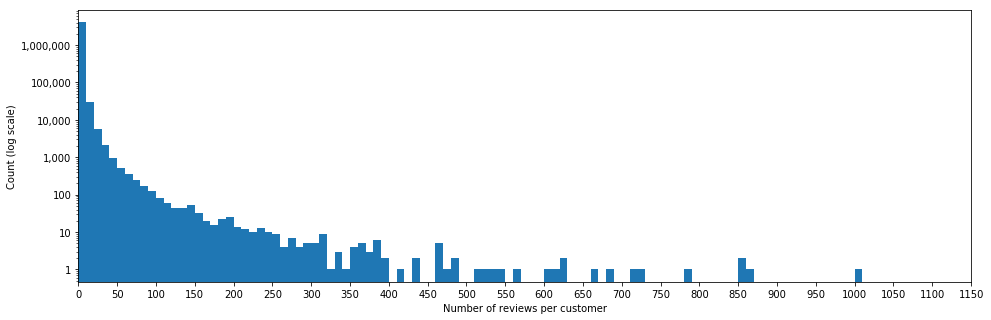

In [ ]:
#First plotted on a standard scale
reviews_per_cus = reviews.customer_id.value_counts().tolist()
binsize = 10
bins = np.arange(0, reviews_per_cus[0]+binsize, binsize)

#As the first bin has almost 4
plt.figure(figsize=[16, 5])
(n, bins, patches) = plt.hist(reviews_per_cus, bins = bins)
plt.xlabel('Number of reviews per customer')
plt.yscale('log')
plt.ylabel('Count (log scale)')
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6], ['1', '10', '100', '1,000', '10,000', '100,000', '1,000,000'])
plt.xticks(np.arange(0, 1200, 50))
plt.xlim(left = 0)
plt.show()

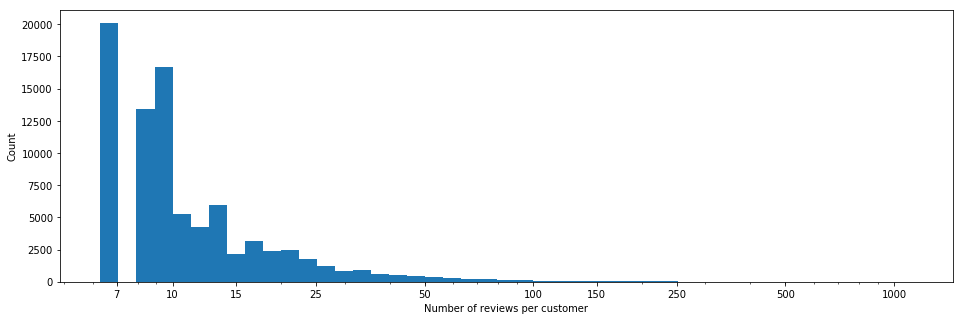

In [ ]:
#The above histogram and its bin values show that there's a long tail in the distribution, that goes out quite 
#far so I'll move it to a log scale.
log_binsize = 0.05
bins = 10 ** np.arange(0.8, np.log10(reviews_per_cus[0])+log_binsize, log_binsize)

plt.figure(figsize=[16, 5])
plt.hist(reviews_per_cus, bins = bins)
plt.xscale('log')
plt.ylabel('Count')
plt.xticks([7e0, 1e1, 1.5e1, 2.5e1, 5e1, 1e2, 1.5e2, 2.5e2, 5e2, 1e3], ['7', '10', '15', '25', '50', '100', '150', '250', '500', '1000'])
plt.xlabel('Number of reviews per customer')
plt.show()

In [ ]:
#General statistics of the number of reviews per person.
print("Mean:",statistics.mean(reviews_per_cus))
print("Median:",statistics.median(reviews_per_cus))
print("Mode:",statistics.mode(reviews_per_cus))
print("stdev:",statistics.stdev(reviews_per_cus))
print("Variance:",statistics.variance(reviews_per_cus))

Mean: 1.6840200972649837
Median: 1.0
Mode: 1
stdev: 3.509075317929728
Variance: 12.313609586903622


As there are a lot of customers who only made 1 review, it skews the data heavily. Approximately there are 3.9 million customers that made only 1 review. Looking at the general statistics of the number of reviews per customer, on average people only make 2 (rounded up from 1.6) reviews.

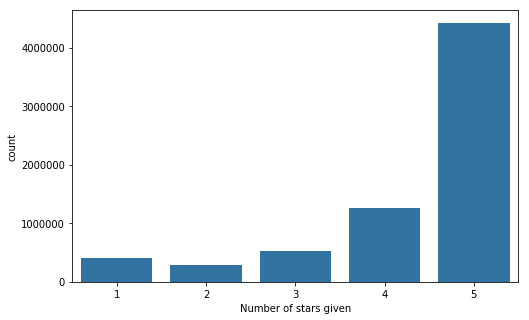

In [ ]:
#A look at total count of each number of stars given in the dataset.
plt.figure(figsize=[8, 5])
sb.countplot(data=reviews, x="star_rating", color=sb.color_palette()[0])
plt.xlabel('Number of stars given')
plt.show()

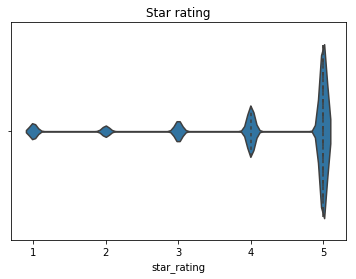

In [ ]:
#Violin plot of the given star ratings.
sb.violinplot(x = reviews["star_rating"], inner = 'quartile')
plt.title('Star rating')
plt.show()

The 2 above graphs indicate that there is a very large number of 5 star ratings given to reviews. Infact, looking at the violingplot, we can see that more 75% of the reviews are given a 4 or 5 star rating. An interesting point was the 2 star ratings were the least given in this dataset.

Next I want to see the helpful votes for each review.
Since there is quite a large difference between the lower end and the upper end, the y-axis is on a log scale.

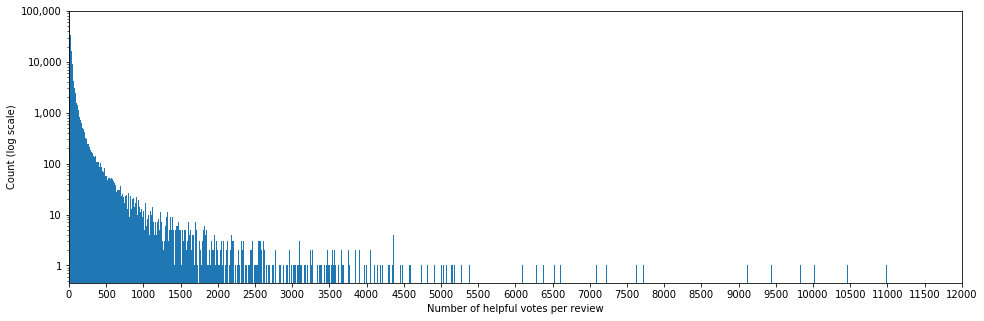

In [ ]:
binsize = 10
bins = np.arange(0, reviews.helpful_votes.max()+binsize, binsize)

plt.figure(figsize=[16, 5])
plt.hist(data=reviews, x="helpful_votes", bins = bins)
plt.yscale('log')
plt.ylabel('Count (log scale)')
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5], ['1', '10', '100', '1,000', '10,000', '100,000', '1,000,000', '10,000,000'])
plt.xlim(left=0, right=12000)
plt.xticks(np.arange(0, 12500, 500))
plt.ylim(top=100000)
plt.xlabel('Number of helpful votes per review')
plt.show()

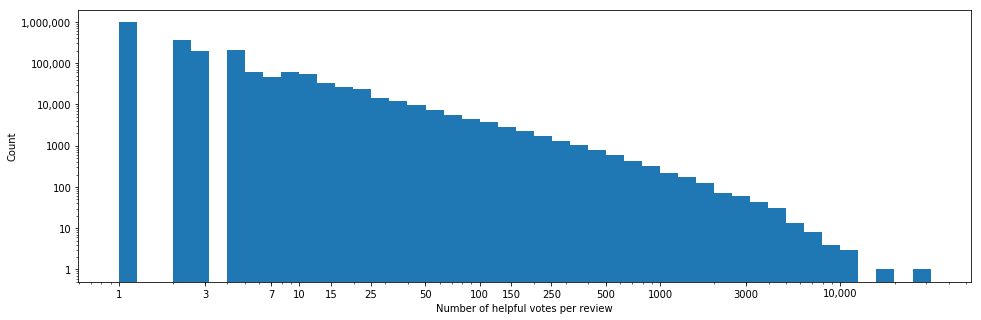

In [ ]:
#The above histogram and its bin values show that there's a long tail in the distribution, that goes out quite 
#far so I'll move it to a log scale.
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(reviews.helpful_votes.max())+log_binsize, log_binsize)

plt.figure(figsize=[16, 5])
plt.hist(data=reviews, x="helpful_votes", bins = bins)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Count')
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5,1e6], ['1', '10', '100', '1000', '10,000', '100,000','1,000,000'])
plt.xticks([1e0, 3e0, 7e0, 1e1, 1.5e1, 2.5e1, 5e1, 1e2, 1.5e2, 2.5e2, 5e2, 1e3, 3e3, 1e4], ['1', '3','7', '10', '15', '25', '50', '100', '150', '250', '500', '1000', '3000', '10,000'])
plt.xlabel('Number of helpful votes per review')
plt.show()

The distribution has a long tail, when moving the graph to a log scale it is clearer to see that the distribution is right skewed with the mode being at 1 helpful review. With the y-axis also in a log scale it is easy to see the drop off of the tail.

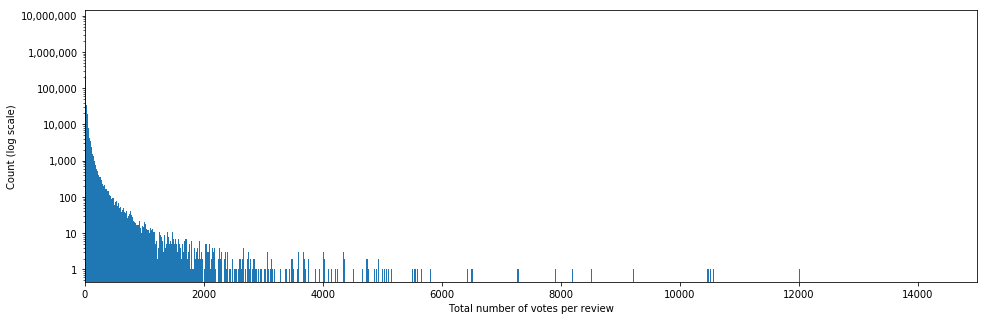

In [ ]:
binsize = 10
bins = np.arange(0, reviews.total_votes.max()+binsize, binsize)

plt.figure(figsize=[16, 5])
plt.hist(data=reviews, x="total_votes", bins = bins)
plt.yscale('log')
plt.ylabel('Count (log scale)')
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7], ['1', '10', '100', '1,000', '10,000', '100,000', '1,000,000', '10,000,000'])
plt.xlim(left=0, right=15000)
plt.xlabel('Total number of votes per review')
plt.show()

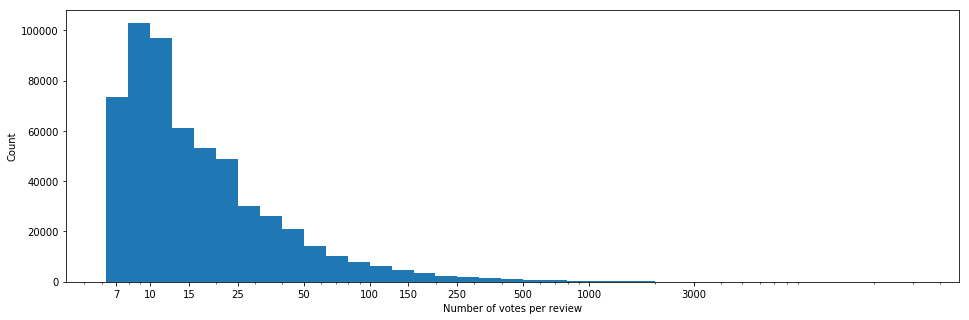

In [ ]:
#The above histogram and its bin values show that there's a long tail in the distribution, that goes out quite 
#far so I'll move it to a log scale.
log_binsize = 0.1
bins = 10 ** np.arange(0.8, np.log10(reviews.total_votes.max())+log_binsize, log_binsize)

plt.figure(figsize=[16, 5])
plt.hist(data=reviews, x="total_votes", bins = bins)
plt.xscale('log')
plt.ylabel('Count')
plt.xticks([7e0, 1e1, 1.5e1, 2.5e1, 5e1, 1e2, 1.5e2, 2.5e2, 5e2, 1e3,3e3], ['7', '10', '15', '25', '50', '100', '150', '250', '500', '1000', '3000'])
plt.xlabel('Number of votes per review')
plt.show()

The distribution has a long tail, when moving the graph to a log scale it is clearer to see that the distribution is unimodal at around 10 votes per reviews. Although the long tail stays through the x-axis log scale graph.

In [ ]:
print("Value counts for total_votes:", len(reviews.total_votes.value_counts()))
print("Value counts for helpful_votes:", len(reviews.helpful_votes.value_counts()))

Value counts for total_votes: 1712
Value counts for helpful_votes: 1569


The next 2 graphs look at the number of reviews in the body of the review and see what the number 

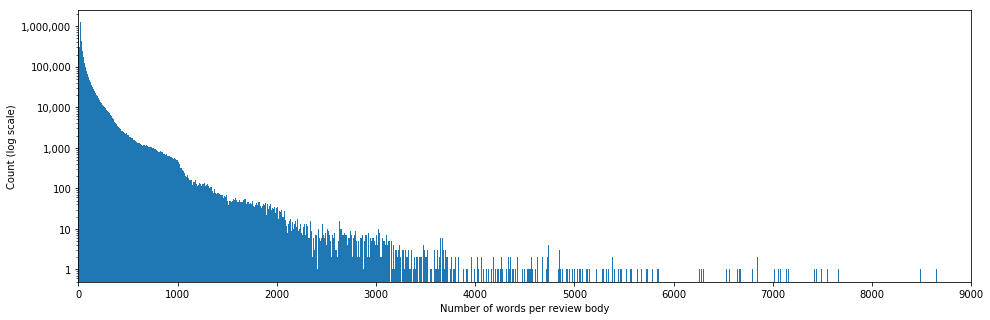

In [ ]:
binsize = 5
bins = np.arange(0, reviews.total_votes.max()+binsize, binsize)

plt.figure(figsize=[16, 5])
plt.hist(data=reviews, x="review_body_len", bins = bins)
plt.yscale('log')
plt.ylabel('Count (log scale)')
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6], ['1', '10', '100', '1,000', '10,000', '100,000', '1,000,000'])
plt.xlim(left=0, right=9000)
plt.xlabel('Number of words per review body')
plt.show()

We can see here that there are a lot of reviews that have a low number of words in the review. Putting the graph on a y-axis with a log scale shows how much the drop off is.

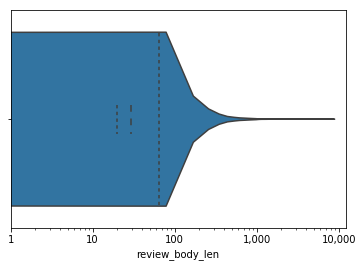

In [ ]:
#plot the number of words per review on a violin plot with the x-axis on a log scale
sb.violinplot(x = reviews["review_body_len"], inner = 'quartile')
plt.xscale('log')
plt.xticks([1e0, 1e1, 1e2, 1e3, 1e4], ['1', '10', '100', '1,000', '10,000']);

Looking at the violin plot of the review body word count, we can see that the median is around 30 words and the 75th percentile has slightly under 100 words per review.

In [ ]:
#General statistics of the number of words per review.
print("Mean:",statistics.mean(reviews.review_body_len))
print("Median:",statistics.median(reviews.review_body_len))
print("Mode:",statistics.mode(reviews.review_body_len))
print("stdev:",statistics.stdev(reviews.review_body_len))
print("Variance:",statistics.variance(reviews.review_body_len))

Mean: 69.30837865089829
Median: 29.0
Mode: 20
stdev: 137.60778942635017
Variance: 18935.903710806728


In [ ]:
reviews_per_product = reviews.product_parent.value_counts().tolist()
binsize = 5
bins = np.arange(0, reviews_per_product[0]+binsize, binsize)

plt.figure(figsize=[16, 5])
plt.hist(reviews_per_product, bins = bins)
plt.xlabel('Number of reviews per customer')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.yticks([1e0, 1e1, 1e2, 1e3], ['1', '10', '100', '1,000'])
plt.xlim(left = 0)
plt.show()

In [ ]:
#The above histogram and its bin values show that the distribution is quite compact towards the low end, with a few points
#going out towards 80,000. So I'll move it to a log scale.
log_binsize = 0.05
bins = 10 ** np.arange(0.8, np.log10(reviews_per_product[0])+log_binsize, log_binsize)

plt.figure(figsize=[16, 5])
plt.hist(reviews_per_product, bins = bins)
plt.xscale('log')
plt.ylabel('Count')
plt.xticks([5e0, 1e1, 2e1, 5e1, 1e2, 2e2, 5e2, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5], ['5', '10', '20', '50', '100', '200', '500', '1000', '2,000', '5,000', '10,000', '20,000', '50,000', '100,000'])
plt.xlabel('Number of reviews per product')
plt.show()

In the log scale it is clear that the distrbution is unimodal and follows a gaussian distribution. It looks like, on average, products have around 100 reviews each.

In [ ]:
#Number of reviews per category
x=reviews.groupby("product_category").count()['customer_id']

plt.figure(figsize=[16, 5])
sb.barplot(x=x.index, y=x.values, color=sb.color_palette()[0])
plt.yscale('log')
plt.yticks([1e1, 1e2, 1e3, 1e4, 1e5, 1e6], ['10', '100', '1000', '10,000', '100,000', '1,000,000'])
plt.xticks(rotation=90)
plt.xlabel('Number of reviews per category')
plt.show()

The bar graph show the spread of how reviews over the different categories. It's interesting how the lowest amount of reviews in a category is pet products. 

I am interested in seeing if there is a trend in the reviews over time.

In [ ]:
#Create a new table to group the months against the number of reviews posted.
review_date_df = reviews[['review_id', 'review_date']].copy()
review_date_df['review_date']=pd.to_datetime(review_date_df.review_date)
review_date_df.index=review_date_df['review_date']
data = review_date_df.groupby(pd.Grouper(freq='M')).review_id.count()

In [ ]:
#A time series graph of the trend in reviews over time.
x=pd.date_range(start='1/1/1995', periods=22, freq='12M').tolist()

plt.figure(figsize=[16, 5])
plt.xticks(x, rotation='vertical')
plt.plot(data)
plt.xlim(left=x[0], right=x[len(x)-1])
plt.grid(b=True)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gcf().autofmt_xdate()

An interesting trend here is that at a lot of new years points there is a spike in the number of reviews. After 2012, this greatly increases. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Looking at the total/helpful votes as well as the word count for each review have quite a large spread in data. The star rating for the dataset is quite interesting, where a very large majority of the stars are given as 5 stars. 2 stars have the lowest amount of stars given.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

From the dataset I would have expect there to be more uniform distribution in the number reviews in each category.  
In the time series graph it was interesting to note that around new year lead to a spike in reviews starting from around 2007 and this becoming very apparent from 2012.

There were a number of operations taken to tidy the data, one of the major tidying the data was to remove reviews that did not parse correctly. As some reviews in the title or body contained a tab break. As a TSV seperator is a tab break, this lead to a lot of reviews being mixed in with other reviews as part of the body. In order to seperate these it would take a lot of time and since I have more than 6 million points of data, I decied to drop these.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
#Correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(reviews[["star_rating","helpful_votes","total_votes", "review_body_len"]].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.yticks(rotation=0)
plt.show()

As we can see from the correlation plot there is a clear trend between the number of helpful votes and total number of votes. This was to be expected as with more votes generally there will be more helpful votes.  
But it looks like there are not many trends outside of those 2 items. The worst is star rating agains review body length with a negative correlation.

In [ ]:
# plot matrix: A sample of 500,000 reviews is used so that plots load render faster
review_samp = reviews.sample(n=500000, random_state=42)

g = sb.PairGrid(data = review_samp, vars = ["star_rating","helpful_votes","total_votes", "review_body_len"])
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

This plot matrix shows visually the relationship. Here you can clearly see the trend between total and helpful votes. But there is almost nothing to see with the relationship between star rating and review length. It looks like the star rating has no bearing on the review length as they look somewhat even between the ratings.

In [ ]:
#Set the numeric and categoric variables to investigate.
numeric_vars = ["helpful_votes", "total_votes", "review_body_len"]
categoric_vars = ['customer_id', 'product_parent', 'product_category']

In [ ]:
#View numeric values of helpful_votes, total_votes, review_body_len against each product category
#All y-axis figures are in a log scale to make it more readable.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = reviews, y_vars = numeric_vars, x_vars = "product_category",
                height = 5, aspect = 3)
g.map(boxgrid)
#g.set_xticklabels(rotation=90)
plt.xticks(rotation=90)
g.set(yscale="log")
plt.show();

The total and helpful votes seem somewhat constant across each category.  On average, 75th percentile of the helpful and total votes for each category are 1 with a maxium of less than 10 and a lot of outliers. Only mobile electronics, personal care appliances and videos having a higher number for the 75th percentile.

Since a lot of the total votes are only around 1 for each review, I want to look at reviewers that have had more than 10 votes given to one or more of their reviews. This is to see if reviewers who get 10 or more votes are constant in getting that many votes or is it just a one time thing.

In [ ]:
#Select a random sample of customers who have recieved more than 10 total votes to a review they made.
cust_samp = np.random.choice(reviews[reviews["total_votes"] >= 10]["customer_id"].unique(), 50)
customers_50 = reviews.loc[reviews['customer_id'].isin(cust_samp)]


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = customers_50, y_vars = numeric_vars, x_vars = 'customer_id',
                height = 5, aspect = 3)
g.map(boxgrid)
g.set(xticklabels=[]) #Each customer is assigned a random ID, so to tidy up the graph they are omitted.
g.set(yscale="log")
plt.show();

In [ ]:
#Values of the random sample of 50 customers.
customers_50.describe()

The sample of customers used seems somewhat consistant with their number of total votes recieved. There are only 2 customers who have outliers that are in the 10+ region. Another point is that a approximately half of customers in this sample only made 1 review and that review managed to get 10 or more total votes.    
Even with the total number of votes for the reviews being helpful vary a bit, but most of the customers' reviews only have 10 helpful votes.  

Looking at the customer review body length for this sample, it looks like on average these customer's reviews are about 100 words long, confirmed by the describe function.

As there are over 4 million customers, a random sample of 50 will not be as indicitive of the whole dataset. So I want to next look at a random sample of 50 items. This could give a better insight into the products as there are only around 16,000 different products. Specifically, I want to see products that have 10 or more reviews.

In [ ]:
#Products that have had 10 or more customer reviews.
x=reviews.groupby("product_id").count()["customer_id"]>=10
prod_samp = np.random.choice(x.index, 50)
products_50 = reviews.loc[reviews['product_id'].isin(prod_samp)]

#As some products have different variations of the name used, use the name that appears first.
item_name_list = []
for i in prod_samp:
    item_name_list.append(reviews.loc[reviews['product_id'].isin([i])].product_title.iloc[0])



def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = products_50, y_vars = numeric_vars, x_vars = 'product_parent',
                height = 5, aspect = 3)
g.map(boxgrid)
plt.xticks(rotation=90)
g.set(xticklabels=item_name_list)
g.set(yscale="log")
plt.show();

In [ ]:
#Values of the random sample of 50 products.
products_50.describe()

Comparing this sample of products the number of helpful votes is the same compared to the total dataset, but the total votes is actually slightly higher.  This makes sense as there are a lot of reviews that only get 1 vote.  An interesting point is that it seems the review body length between the sample of customers and the sample of products is very close only being different by around 10 words.

In [ ]:
#View numeric values of helpful_votes, total_votes, review_body_len against each star rating.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
#     plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4], ['1', '10', '100', '1,000', '10,000'])

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = reviews, y_vars = numeric_vars, x_vars = "star_rating",
                height = 5, aspect = 3)
g.map(boxgrid)
#g.set_xticklabels(rotation=90)
# plt.xticks(rotation=90)
g.set(yscale="log")
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4], ['1', '10', '100', '1,000', '10,000'])
plt.show();

This graph looks at the star ratings for each product across the dataset.  The interesting thing about this is that there are more total and helpful votes for ratings that give 1 or 2 stars compared to 4 or 5 stars. This is quite interesting as there are a lot more stars given as 4 or 5 star ratings.  
Though the review body length is actually pretty similar across each star rating.

In [ ]:
#Use a sample to speed up the calculation time.
review_samp2 = reviews.sample(n=1000000, random_state=84)

plt.figure(figsize = [16, 16])

#Compare the total votes recieved to the length of the review and plot a line of best fit - y-axis on a log scale
ax = plt.subplot(2, 1, 1)
sb.regplot(x="review_body_len", y="total_votes", data=review_samp2, scatter_kws={'alpha':0.1},line_kws={'color':'black'})
plt.xlim(left=0, right=9000)
plt.ylim(top=3e3, bottom= 1e0)
plt.xlabel('length of a review (number of words)')
plt.yscale('log')
plt.yticks([1e0, 3e0, 1e1, 3e1, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4], ['1', '3', '10', '30', '100', '300', '1,000', '3,000', '10,000', '30,000'])
plt.xticks(np.arange(0, 9500, 500))
plt.ylabel('Total votes recieved (log scale)')
plt.grid(True)

#Compare the helpful votes recieved to the length of the review and plot a line of best fit - y-axis on a linear scale
ax = plt.subplot(2, 1, 2)
sb.regplot(x="review_body_len", y="helpful_votes", data=review_samp2, scatter_kws={'alpha':0.1}, line_kws={'color':'black'})
plt.xlim(left=0, right=9000)
plt.ylim(top=12000, bottom=0)
plt.xlabel('length of a review (number of words)')
plt.xticks(np.arange(0, 9500, 500))
plt.yticks(np.arange(0, 13000, 1000))
plt.ylabel('Helpful votes recieved (linear scale)')
plt.grid(True)


plt.show()

One of my original investigation questions was to see if there was a relationship between review characteristics and the length of a review.  Looking only at the scatter plot of the graph it is difficult to see if there is a relationship between the total/helpful votes.   
Adding in a line of best shows there is a slight relationship between votes and length of a review. Since the line is quite flat it seems that the number of words in a review does not have a large effect on the votes/helpful votes recieved.

In [ ]:
#Use a sample to speed up the calculation time.
review_samp3 = reviews.sample(n=1000000, random_state=85)

#Compare the total helpful votes recieved to the length of the review.
plt.figure(figsize = [16, 6])
sb.pointplot(x="star_rating", y="review_body_len", data=review_samp3)
plt.xlim(right=4.5)
plt.ylabel('average length of a review (number of words)')
plt.xticks([0,1,2,3,4],[1,2,3,4,5])
plt.xlabel('star rating')
plt.grid(True)
plt.show()

In [ ]:
#Use a sample to speed up the calculation time.
review_samp3 = reviews.sample(n=1000000, random_state=85)

#Put 2 plots on the same axis with different scales
fig, ax1 = plt.subplots(figsize=(16, 6))

#Average of the review body word count vs star rating
colour = 'tab:red'
sb.pointplot(x="star_rating", y="review_body_len", data=review_samp3, color=colour)
ax1.set_xlabel('star rating')
ax1.set_ylabel('review body word count', color=colour)
ax1.grid(True)

#Average of the review helpful votes vs star rating
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
colour = 'tab:blue'
sb.pointplot(x="star_rating", y="helpful_votes", data=review_samp3, color=colour)
ax2.set_xlabel('star_rating')
ax2.set_ylabel('helpful votes', color=colour)
ax2.grid(True)

plt.show();

Looking at the trends for each star rating against the review body word count and helpful votes, it is interesting to see that on average 2 star reviews have longer review word counts, but a lower number of helpful votes. For 1 star reviews, this is the opposite; more helpful votes but a lower word count.

As I had not investigated very deeply into vine and verified purchases yet, I wanted to see if there was a relationship that could be found.  
To see a clear difference for each category, a log scale was used on the y-axis.

In [ ]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [16, 16])

# subplot 1: product_category vs vine
ax = plt.subplot(3, 1, 1)
plt.yscale('log')
plt.xticks(rotation=90)
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6], ['1', '10', '100', '1,000', '10,000', '100,000', '1,000,000'])
sb.countplot(data = reviews, x = 'product_category', hue = 'vine', palette = 'Blues')
ax.legend(ncol = 2, title = "vine") # re-arrange legend to reduce overlapping

# subplot 2: product_category vs. verified_purchase
ax = plt.subplot(3, 1, 2)
plt.yscale('log')
plt.xticks(rotation=90)
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6], ['1', '10', '100', '1,000', '10,000', '100,000', '1,000,000'])
sb.countplot(data = reviews, x = 'product_category', hue = 'verified_purchase', palette = 'Blues')
ax.legend(ncol = 2, title = "verified purchase") 

# subplot 3: product_category vs. star_rating
ax = plt.subplot(3, 1, 3)
plt.yscale('log')
plt.yticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6], ['1', '10', '100', '1,000', '10,000', '100,000', '1,000,000'])
sb.countplot(data = reviews, x = 'product_category', hue = 'star_rating', palette = 'Blues')
ax.legend(loc=9, ncol = 3, title = "star rating") # re-arrange legend to remove overlapping

plt.xticks(rotation=90)
plt.show()

People who are apart of the vine program, are people that recieve products to review before they are released. As this is a realtiviely new program there are not many customers participating within this dataset. It seems the 2 most popular categories for vine reviews are in books at PC parts.  
Verified purchases are customers that Amazon has confirmed that the customer bought the product. As anyone can review a product, it can mean that some people are only reviewing a product based on something they heard. Looking at the second graph it seems like there is no a lot of difference between verified purchases or not. I would have expected non-verified purchases to be a lot less.  
From the graph above showing the number of star ratings for the total dataset, it is no surprise that in each category that 4 and 5 stars are the highest and 2 stars are the lowest. There are a some categories that do not follow the overall trend, such as groceries, but they still have the most stars in the 5 column.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The main, and easily observable, relationship is between the total number of votes and the number of helpful votes. This is something that I expect to observe as the more votes there are, on average you would expect the number of helpful votes to go up with it.  
Originally I was expect there to be a big relationship between the number of votes and star rating, but it seems like there is only a slight difference between from the norm in 1 and 2 star columns.   
While there are a lot of datapoints for the scatter graphs, the line of best fit shows that there is a slight relationship. Generally, the more words per review does not mean that there will be a large number of total/helpful votes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

An interesting point was that, on average, 2 star ratings have more words per review than the other star ratings and that 5 star ratings were the lowest.

## Multivariate Exploration

First I want to see some charastics of the top 3 customers who made the most reviews.

In [ ]:
#Display the top 3 reviewers with the most reviews
reviews.groupby("customer_id").count()["review_id"].nlargest(3)

In [ ]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [16, 16])
# plt.title("Top 3 customers with the most reviews")

# subplot 1: product_category vs vine
ax = plt.subplot(3, 1, 1)
plt.title("Top 3 customers with the most reviews")
data = reviews.loc[reviews['customer_id'].isin(["50881246"])]
sb.scatterplot(data = data, x = 'review_body_len', y = 'star_rating', size="helpful_votes", sizes=(50, 500),legend="brief") #palette=cmap);
plt.yticks(np.arange(0, 6, 1))
plt.xticks(np.arange(0, 3100, 100));
ax.legend(ncol = 1) # re-arrange legend to reduce overlapping

# subplot 2: product_category vs. verified_purchase
ax = plt.subplot(3, 1, 2)
data = reviews.loc[reviews['customer_id'].isin(["19792742"])]
sb.scatterplot(data = data, x = 'review_body_len', y = 'star_rating', size="helpful_votes", sizes=(50, 500),legend="brief") #palette=cmap);
plt.yticks(np.arange(0, 6, 1))
plt.xticks(np.arange(0, 3100, 100));
ax.legend(ncol = 1) 

# subplot 3: product_category vs. star_rating
ax = plt.subplot(3, 1, 3)
data = reviews.loc[reviews['customer_id'].isin(["14539589"])]
sb.scatterplot(data = data, x = 'review_body_len', y = 'star_rating', size="helpful_votes", sizes=(10, 500),legend="brief") #palette=cmap);
plt.yticks(np.arange(0, 6, 1))
plt.xticks(np.arange(0, 3100, 100));
ax.legend(ncol = 1) # re-arrange legend to remove overlapping

# plt.xticks(rotation=90)
plt.show()

Looking at the top 3 customers with the most reviews, the second reviewer on average has longer reviews than the other 2. But it also seems that the first and thrid customers have more helpful votes to for their reviews. Though it seems these customers have the same number of reviews per given star. 

In [ ]:
#Use a sample to speed up the calculation time.
review_samp4 = reviews.sample(n=100000, random_state=184)

#Compare the helpful votes recieved to the length of the review and plot a line of best fit split by star rating - log scale
colours = {1: "red", 2: "blue", 3: "green", 4: "orange", 5:"black"}
sb.lmplot(x="review_body_len", y="helpful_votes", data=review_samp4, scatter_kws={'alpha':0.5}, hue='star_rating', palette=colours, height=8, aspect=2)
plt.xlim(left=1e0)
plt.ylim(bottom=1e0)
plt.yscale('log')
plt.yticks([1e0, 3e0, 1e1, 3e1, 1e2, 3e2, 1e3, 3e3, 1e4], ['1', '3', '10', '30', '100', '300', '1,000', '3,000', '10,000'])
plt.xlabel('length of a review (number of words)')
plt.ylabel('Helpful votes recieved (log scale)')
plt.title('helpful votes vs review word count')
plt.grid(True);

In [ ]:
plt.figure(figsize = [16, 6])

#Investigate the relationship between the verified purchases, star ratings and the number of helpful votes
ax = plt.subplot(1, 2, 1)
plt.title('Verified purchase customers')
cat_means = reviews.groupby(['star_rating', 'verified_purchase']).mean()['helpful_votes']
cat_means = cat_means.reset_index(name = 'helpful_votes')
cat_means = cat_means.pivot(index = 'verified_purchase', columns = 'star_rating',
                            values = 'helpful_votes')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(helpful_votes)'});

#Investigate the relationship between vine customers, star ratings and the number of helpful votes
ax = plt.subplot(1, 2, 2)
plt.title('Vine customers')
cat_means = reviews.groupby(['star_rating', 'vine']).mean()['helpful_votes']
cat_means = cat_means.reset_index(name = 'helpful_votes')
cat_means = cat_means.pivot(index = 'vine', columns = 'star_rating',
                            values = 'helpful_votes')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(helpful_votes)'});

plt.show()

The first diagram show that there is an interesting relationship between verified purchases and 1 star ratings. More people find these reviews to be helpful. It also seems that people don't find people with verified purchases to leave helpful reviews compared to people who have made verified purchases.  
The helpful votes for vine purchases is quite interesting. People find vine reviewers to be quite useful across all ratings. This could because the vine program only uses customers chosen by Amazon to be apart of the program, meaning that their reviews prior to the vine program were good.

In [ ]:
#split each category into its star rating and view the average number of helpful reviews
plt.figure(figsize = [16, 16])
cat_means = reviews.groupby(['star_rating', 'product_category']).mean()['helpful_votes']
cat_means = cat_means.reset_index(name = 'helpful_votes')
cat_means = cat_means.pivot(index = 'product_category', columns = 'star_rating',
                            values = 'helpful_votes')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(helpful_votes)'});

This I think is interesting. While most reviews give 5 stars, the actual number of helpful votes is found more in the 1 star column, with 3 star reviews on mobile electronics getting the most helpful votes. Although, on average, most other categories have the most helpful reviews within the 1 star column. This confirms what was observed by the above box plots. 

In [ ]:
plt.figure(figsize = [16, 5])

#Investigate the relationship between the verified purchases, star ratings and the review body length.
ax = plt.subplot(1, 2, 1)
plt.title('Verified purchase customers')
cat_means = reviews.groupby(['star_rating', 'verified_purchase']).mean()['review_body_len']
cat_means = cat_means.reset_index(name = 'review_body_len')
cat_means = cat_means.pivot(index = 'verified_purchase', columns = 'star_rating',
                            values = 'review_body_len')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(review_body_len)'});

#Investigate the relationship between vine customers, star ratings and the review body length.
ax = plt.subplot(1, 2, 2)
plt.title('Vine customers')
cat_means = reviews.groupby(['star_rating', 'vine']).mean()['review_body_len']
cat_means = cat_means.reset_index(name = 'review_body_len')
cat_means = cat_means.pivot(index = 'vine', columns = 'star_rating',
                            values = 'review_body_len')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(review_body_len)'});

plt.show()

These 2 diagrams follow a similar pattern to the above diagrams of average helpful votes. People who leave un-verified purchase reviews and customers who are apart of the vine program are more likely to make longer reviews.   

In [ ]:
#split each category into its star rating and view the average review length.
plt.figure(figsize = [16, 16])
cat_means = reviews.groupby(['star_rating', 'product_category']).mean()['review_body_len']
cat_means = cat_means.reset_index(name = 'review_body_len')
cat_means = cat_means.pivot(index = 'product_category', columns = 'star_rating',
                            values = 'review_body_len')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(review_body_len)'});

This diagram doesn't follow the same pattern as observed above. In this case the average length of a review is longest in the video and DVD section followed by the books category. In both cases the longest reviews are in the 2 and 3 star column. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In regards the to helpful votes for each star rating, it does seem there is some relationship between them and the categories. There are very few categories that have more helpful votes in the 5 star column over the 1 star column.  
Vine program reviewers also have more helpful votes over non-vine participants, but they still follow the trend that there are more helpful votes in the 1 and 2 star columns.

### Were there any interesting or surprising interactions between features?

A surprising point was that there people find non-verified purchases more helpful than that of people who made verified purchases, even though there are more verified purchases within the dataset. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!